In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session, Query, create_session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)
conn = engine.connect()

In [6]:
engine.table_names()

['measurement', 'station']

In [7]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [8]:
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [9]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)


In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
Session = Session(engine)

In [13]:
# Display the row's columns & data in dictionary format for each table

first_row_measurement = Session.query(measurement).first()
print(first_row_measurement.__dict__)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ff21b236490>, 'id': 1, 'tobs': 65.0, 'station': 'USC00519397', 'prcp': 0.08, 'date': '2010-01-01'}


In [14]:
# Display the row's columns & data in dictionary format for each table

first_row_station = Session.query(station).first()
print(first_row_station.__dict__)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ff21b2414c0>, 'longitude': -157.8168, 'latitude': 21.2716, 'station': 'USC00519397', 'elevation': 3.0, 'name': 'WAIKIKI 717.2, HI US', 'id': 1}


# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Last Date == '2017-8-23'
# Twelve Months ago = '2016-8-23'

for row in Session.query(measurement.date, measurement.prcp).\
    order_by(measurement.date.desc()).all():
        print(row)

('2017-08-23', 0.0)
('2017-08-23', 0.0)
('2017-08-23', 0.08)
('2017-08-23', 0.45)
('2017-08-22', 0.0)
('2017-08-22', 0.0)
('2017-08-22', 0.5)
('2017-08-21', 0.0)
('2017-08-21', 0.02)
('2017-08-21', None)
('2017-08-21', 0.56)
('2017-08-20', 0.0)
('2017-08-20', 0.01)
('2017-08-20', None)
('2017-08-19', 0.0)
('2017-08-19', 0.0)
('2017-08-19', None)
('2017-08-19', 0.09)
('2017-08-18', 0.0)
('2017-08-18', 0.0)
('2017-08-18', 0.06)
('2017-08-18', None)
('2017-08-17', 0.0)
('2017-08-17', 0.05)
('2017-08-17', 0.01)
('2017-08-17', 0.13)
('2017-08-16', 0.0)
('2017-08-16', 0.07)
('2017-08-16', 0.12)
('2017-08-16', 0.42)
('2017-08-15', 0.02)
('2017-08-15', 0.0)
('2017-08-15', 0.06)
('2017-08-15', 0.32)
('2017-08-15', 0.42)
('2017-08-14', 0.0)
('2017-08-14', 0.01)
('2017-08-14', 0.08)
('2017-08-14', 0.0)
('2017-08-14', 0.22)
('2017-08-13', 0.0)
('2017-08-13', None)
('2017-08-13', 0.0)
('2017-08-13', 0.0)
('2017-08-13', None)
('2017-08-12', 0.0)
('2017-08-12', 0.0)
('2017-08-12', 0.14)
('2017-08-11'

('2017-03-22', 0.0)
('2017-03-22', 0.0)
('2017-03-22', 0.0)
('2017-03-22', 0.0)
('2017-03-22', 0.0)
('2017-03-22', 0.0)
('2017-03-21', 0.0)
('2017-03-21', 0.0)
('2017-03-21', 0.0)
('2017-03-21', 0.0)
('2017-03-21', 0.09)
('2017-03-21', 0.0)
('2017-03-20', 0.0)
('2017-03-20', 0.0)
('2017-03-20', None)
('2017-03-20', 0.0)
('2017-03-20', 0.02)
('2017-03-20', 0.0)
('2017-03-19', 0.0)
('2017-03-19', 0.0)
('2017-03-19', 0.0)
('2017-03-19', 0.0)
('2017-03-19', 0.0)
('2017-03-18', 0.0)
('2017-03-18', 0.0)
('2017-03-18', 0.0)
('2017-03-18', 0.0)
('2017-03-18', 0.0)
('2017-03-18', None)
('2017-03-17', 0.0)
('2017-03-17', 0.19)
('2017-03-17', 0.06)
('2017-03-17', None)
('2017-03-17', 0.35)
('2017-03-17', 0.12)
('2017-03-16', 0.0)
('2017-03-16', 0.0)
('2017-03-16', None)
('2017-03-16', None)
('2017-03-16', 0.0)
('2017-03-16', 0.0)
('2017-03-16', 0.0)
('2017-03-15', 0.0)
('2017-03-15', 0.0)
('2017-03-15', 0.0)
('2017-03-15', 0.0)
('2017-03-15', 0.06)
('2017-03-15', 0.0)
('2017-03-14', 0.0)
('2017-0

('2016-10-14', 0.0)
('2016-10-14', 0.0)
('2016-10-14', 0.0)
('2016-10-14', 0.0)
('2016-10-13', 0.0)
('2016-10-13', 0.0)
('2016-10-13', 0.02)
('2016-10-13', None)
('2016-10-13', 0.0)
('2016-10-13', 0.0)
('2016-10-13', 0.06)
('2016-10-12', 0.0)
('2016-10-12', 0.03)
('2016-10-12', 0.0)
('2016-10-12', 0.0)
('2016-10-12', 0.03)
('2016-10-12', 0.02)
('2016-10-11', 0.0)
('2016-10-11', 0.02)
('2016-10-11', 0.04)
('2016-10-11', None)
('2016-10-11', 0.0)
('2016-10-11', 0.28)
('2016-10-11', 0.35)
('2016-10-10', 0.0)
('2016-10-10', 0.0)
('2016-10-10', None)
('2016-10-10', 0.0)
('2016-10-10', 0.0)
('2016-10-10', 0.0)
('2016-10-09', 0.0)
('2016-10-09', 0.0)
('2016-10-09', 0.0)
('2016-10-09', 0.0)
('2016-10-09', 0.0)
('2016-10-08', 0.0)
('2016-10-08', 0.0)
('2016-10-08', 0.0)
('2016-10-08', 0.0)
('2016-10-08', 0.04)
('2016-10-07', 0.0)
('2016-10-07', 0.0)
('2016-10-07', 0.0)
('2016-10-07', None)
('2016-10-07', 0.0)
('2016-10-07', 0.0)
('2016-10-07', 0.01)
('2016-10-06', 0.0)
('2016-10-06', 0.05)
('20

('2016-07-27', 0.0)
('2016-07-27', 0.02)
('2016-07-27', 0.0)
('2016-07-27', None)
('2016-07-27', 0.0)
('2016-07-27', 0.06)
('2016-07-27', 0.04)
('2016-07-26', 0.0)
('2016-07-26', 0.0)
('2016-07-26', 0.01)
('2016-07-26', 0.0)
('2016-07-26', 0.9)
('2016-07-26', 0.03)
('2016-07-25', 4.2)
('2016-07-25', 7.65)
('2016-07-25', None)
('2016-07-25', None)
('2016-07-25', 3.01)
('2016-07-25', 9.64)
('2016-07-25', 5.35)
('2016-07-24', 0.13)
('2016-07-24', 0.15)
('2016-07-24', 0.18)
('2016-07-24', 0.45)
('2016-07-24', 2.75)
('2016-07-23', 0.0)
('2016-07-23', 0.16)
('2016-07-23', None)
('2016-07-23', 0.07)
('2016-07-23', None)
('2016-07-22', 0.02)
('2016-07-22', 0.06)
('2016-07-22', 0.0)
('2016-07-22', 0.13)
('2016-07-21', 0.04)
('2016-07-21', 0.04)
('2016-07-21', None)
('2016-07-21', 0.06)
('2016-07-21', 0.01)
('2016-07-20', 0.0)
('2016-07-20', 0.0)
('2016-07-20', 0.0)
('2016-07-20', None)
('2016-07-20', 0.02)
('2016-07-20', 0.02)
('2016-07-20', 0.08)
('2016-07-19', 0.03)
('2016-07-19', 0.08)
('201

('2016-02-20', 0.07)
('2016-02-20', 0.09)
('2016-02-20', None)
('2016-02-20', 0.05)
('2016-02-20', 0.06)
('2016-02-20', 0.1)
('2016-02-19', 0.03)
('2016-02-19', 0.11)
('2016-02-19', 0.09)
('2016-02-19', None)
('2016-02-19', 0.2)
('2016-02-19', 0.0)
('2016-02-19', 0.58)
('2016-02-18', 0.02)
('2016-02-18', 0.02)
('2016-02-18', 0.0)
('2016-02-18', None)
('2016-02-18', 0.0)
('2016-02-18', 0.02)
('2016-02-18', None)
('2016-02-17', 0.21)
('2016-02-17', 0.1)
('2016-02-17', 0.13)
('2016-02-17', None)
('2016-02-17', 0.22)
('2016-02-17', 0.11)
('2016-02-16', 0.02)
('2016-02-16', 0.05)
('2016-02-16', 0.03)
('2016-02-16', None)
('2016-02-16', 0.04)
('2016-02-16', 0.03)
('2016-02-16', 0.01)
('2016-02-15', 0.0)
('2016-02-15', 0.0)
('2016-02-15', 0.23)
('2016-02-15', None)
('2016-02-15', 0.0)
('2016-02-15', 0.05)
('2016-02-14', 0.0)
('2016-02-14', 0.0)
('2016-02-14', 0.0)
('2016-02-14', 0.0)
('2016-02-14', 0.11)
('2016-02-13', 0.0)
('2016-02-13', 0.02)
('2016-02-13', 0.0)
('2016-02-13', 0.22)
('2016-

('2015-11-30', None)
('2015-11-30', 0.01)
('2015-11-30', 0.04)
('2015-11-30', 0.04)
('2015-11-29', 0.03)
('2015-11-29', 0.02)
('2015-11-29', 0.14)
('2015-11-29', 0.08)
('2015-11-29', 0.19)
('2015-11-28', 0.02)
('2015-11-28', 0.07)
('2015-11-28', 0.05)
('2015-11-28', 0.02)
('2015-11-28', 0.08)
('2015-11-28', 0.16)
('2015-11-27', 0.11)
('2015-11-27', 0.91)
('2015-11-27', 0.66)
('2015-11-27', None)
('2015-11-27', 0.49)
('2015-11-27', 0.72)
('2015-11-27', 3.26)
('2015-11-26', 0.36)
('2015-11-26', 0.36)
('2015-11-26', 0.27)
('2015-11-26', 0.58)
('2015-11-26', 0.82)
('2015-11-26', 3.68)
('2015-11-25', 0.01)
('2015-11-25', 0.11)
('2015-11-25', 0.01)
('2015-11-25', None)
('2015-11-25', 0.13)
('2015-11-25', 0.12)
('2015-11-25', 0.11)
('2015-11-24', 0.75)
('2015-11-24', 1.7)
('2015-11-24', 0.08)
('2015-11-24', None)
('2015-11-24', 1.12)
('2015-11-24', 0.98)
('2015-11-24', 1.46)
('2015-11-23', 0.62)
('2015-11-23', 0.48)
('2015-11-23', 1.75)
('2015-11-23', None)
('2015-11-23', 1.1)
('2015-11-23', 

('2015-07-01', 0.0)
('2015-07-01', None)
('2015-07-01', 0.0)
('2015-07-01', 0.01)
('2015-07-01', None)
('2015-07-01', 0.0)
('2015-06-30', 0.0)
('2015-06-30', 1.1)
('2015-06-30', None)
('2015-06-30', 0.0)
('2015-06-30', 0.16)
('2015-06-30', 0.0)
('2015-06-29', 0.0)
('2015-06-29', None)
('2015-06-29', 0.11)
('2015-06-29', None)
('2015-06-29', None)
('2015-06-29', 0.27)
('2015-06-29', 1.62)
('2015-06-28', 0.0)
('2015-06-28', 0.0)
('2015-06-28', 0.02)
('2015-06-28', 0.16)
('2015-06-27', 0.0)
('2015-06-27', 0.06)
('2015-06-27', 0.09)
('2015-06-27', 0.0)
('2015-06-27', 0.21)
('2015-06-27', 0.17)
('2015-06-26', 0.0)
('2015-06-26', 0.1)
('2015-06-26', 0.11)
('2015-06-26', 0.0)
('2015-06-26', 0.02)
('2015-06-26', 0.01)
('2015-06-26', 0.4)
('2015-06-25', 0.03)
('2015-06-25', 0.2)
('2015-06-25', 0.2)
('2015-06-25', None)
('2015-06-25', 0.14)
('2015-06-25', 0.21)
('2015-06-25', 0.01)
('2015-06-25', 1.36)
('2015-06-24', 0.03)
('2015-06-24', 0.14)
('2015-06-24', 0.01)
('2015-06-24', 0.09)
('2015-06-

('2015-04-17', 0.06)
('2015-04-17', 0.01)
('2015-04-17', 0.06)
('2015-04-17', 0.07)
('2015-04-17', 0.1)
('2015-04-17', 0.0)
('2015-04-17', 1.2)
('2015-04-16', 0.0)
('2015-04-16', 0.04)
('2015-04-16', 0.02)
('2015-04-16', 0.0)
('2015-04-16', 0.02)
('2015-04-16', 0.0)
('2015-04-16', 0.17)
('2015-04-15', 0.01)
('2015-04-15', 0.05)
('2015-04-15', 0.21)
('2015-04-15', 0.02)
('2015-04-15', 0.19)
('2015-04-15', 0.0)
('2015-04-15', 0.62)
('2015-04-14', 0.03)
('2015-04-14', 0.01)
('2015-04-14', 0.09)
('2015-04-14', 0.07)
('2015-04-14', 0.07)
('2015-04-14', 0.1)
('2015-04-14', 0.74)
('2015-04-13', 0.0)
('2015-04-13', 0.03)
('2015-04-13', 0.08)
('2015-04-13', 0.0)
('2015-04-13', 0.05)
('2015-04-13', None)
('2015-04-13', 0.28)
('2015-04-12', 0.0)
('2015-04-12', 0.09)
('2015-04-12', 0.01)
('2015-04-12', 0.0)
('2015-04-12', 0.18)
('2015-04-12', 0.73)
('2015-04-11', 0.0)
('2015-04-11', 0.0)
('2015-04-11', 0.0)
('2015-04-11', None)
('2015-04-11', 0.0)
('2015-04-11', 0.09)
('2015-04-10', 0.0)
('2015-04

('2014-11-24', 0.13)
('2014-11-24', 0.34)
('2014-11-24', 0.1)
('2014-11-24', 0.0)
('2014-11-24', 0.0)
('2014-11-23', 0.0)
('2014-11-23', 0.0)
('2014-11-23', 0.0)
('2014-11-23', 0.0)
('2014-11-23', 0.0)
('2014-11-23', 0.0)
('2014-11-23', 0.0)
('2014-11-22', 0.0)
('2014-11-22', 0.0)
('2014-11-22', 0.0)
('2014-11-22', 0.0)
('2014-11-22', 0.01)
('2014-11-22', 0.0)
('2014-11-22', 0.44)
('2014-11-21', 0.0)
('2014-11-21', 0.01)
('2014-11-21', 0.01)
('2014-11-21', None)
('2014-11-21', 0.0)
('2014-11-21', 0.0)
('2014-11-21', 0.0)
('2014-11-21', 0.03)
('2014-11-20', 0.08)
('2014-11-20', 0.01)
('2014-11-20', 0.0)
('2014-11-20', None)
('2014-11-20', None)
('2014-11-20', 0.02)
('2014-11-20', 0.01)
('2014-11-20', 0.61)
('2014-11-19', 0.0)
('2014-11-19', 0.01)
('2014-11-19', 0.0)
('2014-11-19', 0.0)
('2014-11-19', 0.0)
('2014-11-19', None)
('2014-11-18', 0.0)
('2014-11-18', 0.0)
('2014-11-18', 0.0)
('2014-11-18', 0.0)
('2014-11-18', 0.0)
('2014-11-18', 0.0)
('2014-11-17', 0.0)
('2014-11-17', 0.0)
('2

('2014-09-13', 0.0)
('2014-09-13', 0.0)
('2014-09-13', 0.0)
('2014-09-12', 0.0)
('2014-09-12', 0.01)
('2014-09-12', 0.3)
('2014-09-12', 0.0)
('2014-09-12', 0.0)
('2014-09-12', 0.09)
('2014-09-12', 0.0)
('2014-09-11', 0.0)
('2014-09-11', 0.0)
('2014-09-11', 0.0)
('2014-09-11', 0.0)
('2014-09-11', 0.0)
('2014-09-11', 0.02)
('2014-09-11', 0.0)
('2014-09-10', 0.0)
('2014-09-10', 0.04)
('2014-09-10', 0.01)
('2014-09-10', 0.0)
('2014-09-10', 0.0)
('2014-09-10', 0.0)
('2014-09-10', 0.0)
('2014-09-09', 0.0)
('2014-09-09', 0.03)
('2014-09-09', 0.0)
('2014-09-09', 0.0)
('2014-09-09', 0.0)
('2014-09-09', 0.0)
('2014-09-09', 0.0)
('2014-09-09', None)
('2014-09-08', 0.0)
('2014-09-08', 0.0)
('2014-09-08', 0.0)
('2014-09-08', None)
('2014-09-08', 0.0)
('2014-09-08', 0.0)
('2014-09-08', 0.0)
('2014-09-07', 0.0)
('2014-09-07', 0.29)
('2014-09-07', None)
('2014-09-07', 0.0)
('2014-09-07', 0.01)
('2014-09-07', 0.0)
('2014-09-07', 0.14)
('2014-09-06', 0.22)
('2014-09-06', 0.61)
('2014-09-06', 0.0)
('2014

('2014-04-26', 0.03)
('2014-04-26', 0.0)
('2014-04-26', 0.1)
('2014-04-25', 0.01)
('2014-04-25', 0.26)
('2014-04-25', 0.25)
('2014-04-25', 0.0)
('2014-04-25', 0.2)
('2014-04-25', 0.0)
('2014-04-25', 0.81)
('2014-04-24', 0.0)
('2014-04-24', 0.0)
('2014-04-24', 0.0)
('2014-04-24', 0.0)
('2014-04-24', None)
('2014-04-24', 0.22)
('2014-04-24', 0.0)
('2014-04-24', 0.23)
('2014-04-23', 0.0)
('2014-04-23', 0.0)
('2014-04-23', 0.0)
('2014-04-23', 0.0)
('2014-04-23', 0.0)
('2014-04-23', 0.0)
('2014-04-23', 0.07)
('2014-04-22', 0.05)
('2014-04-22', 0.12)
('2014-04-22', 0.09)
('2014-04-22', 0.09)
('2014-04-22', 0.13)
('2014-04-22', 0.24)
('2014-04-22', 0.01)
('2014-04-22', 1.56)
('2014-04-21', 0.06)
('2014-04-21', 0.09)
('2014-04-21', 0.12)
('2014-04-21', None)
('2014-04-21', 0.21)
('2014-04-21', 0.22)
('2014-04-21', 0.03)
('2014-04-21', 1.9)
('2014-04-20', 0.0)
('2014-04-20', 0.03)
('2014-04-20', None)
('2014-04-20', 0.0)
('2014-04-20', 0.12)
('2014-04-20', 0.0)
('2014-04-20', 0.21)
('2014-04-19

('2014-02-14', 0.01)
('2014-02-14', 0.02)
('2014-02-14', None)
('2014-02-14', 0.0)
('2014-02-14', 0.1)
('2014-02-14', 0.0)
('2014-02-14', 0.12)
('2014-02-13', 0.0)
('2014-02-13', 0.0)
('2014-02-13', 0.0)
('2014-02-13', 0.0)
('2014-02-13', 0.0)
('2014-02-13', 0.0)
('2014-02-13', 0.0)
('2014-02-13', 0.0)
('2014-02-13', 0.0)
('2014-02-12', 0.0)
('2014-02-12', 0.0)
('2014-02-12', 0.0)
('2014-02-12', 0.0)
('2014-02-12', 0.0)
('2014-02-12', 0.05)
('2014-02-12', 0.01)
('2014-02-12', 0.0)
('2014-02-12', 0.0)
('2014-02-11', 0.0)
('2014-02-11', 0.0)
('2014-02-11', 0.0)
('2014-02-11', None)
('2014-02-11', 0.0)
('2014-02-11', 0.0)
('2014-02-11', 0.0)
('2014-02-11', 0.0)
('2014-02-10', 0.0)
('2014-02-10', 0.01)
('2014-02-10', None)
('2014-02-10', None)
('2014-02-10', 0.03)
('2014-02-10', 0.05)
('2014-02-10', 0.0)
('2014-02-10', 0.01)
('2014-02-09', 0.0)
('2014-02-09', 0.36)
('2014-02-09', 0.44)
('2014-02-09', 1.14)
('2014-02-09', 0.0)
('2014-02-09', 0.22)
('2014-02-08', 0.0)
('2014-02-08', 1.1)
('2

('2013-10-02', None)
('2013-10-02', 0.0)
('2013-10-02', 0.01)
('2013-10-02', 0.0)
('2013-10-02', 0.24)
('2013-10-01', 0.0)
('2013-10-01', 0.0)
('2013-10-01', 0.05)
('2013-10-01', None)
('2013-10-01', 0.0)
('2013-10-01', 0.67)
('2013-10-01', 0.01)
('2013-10-01', 0.55)
('2013-09-30', 0.02)
('2013-09-30', 0.06)
('2013-09-30', None)
('2013-09-30', None)
('2013-09-30', None)
('2013-09-30', 0.13)
('2013-09-30', 0.04)
('2013-09-30', 0.0)
('2013-09-30', 0.7)
('2013-09-29', 0.08)
('2013-09-29', 0.08)
('2013-09-29', 0.07)
('2013-09-29', 0.0)
('2013-09-29', 0.1)
('2013-09-29', 0.46)
('2013-09-28', 0.0)
('2013-09-28', 0.0)
('2013-09-28', 0.0)
('2013-09-28', 0.0)
('2013-09-28', 0.0)
('2013-09-28', 0.0)
('2013-09-28', 0.11)
('2013-09-27', 0.0)
('2013-09-27', 0.0)
('2013-09-27', 0.0)
('2013-09-27', 0.03)
('2013-09-27', 0.02)
('2013-09-27', 0.01)
('2013-09-27', 0.04)
('2013-09-27', None)
('2013-09-26', 0.07)
('2013-09-26', 0.05)
('2013-09-26', 0.19)
('2013-09-26', 0.2)
('2013-09-26', 0.49)
('2013-09-2

('2013-07-26', 0.0)
('2013-07-26', 0.01)
('2013-07-26', 0.0)
('2013-07-26', 0.0)
('2013-07-25', 0.0)
('2013-07-25', 0.0)
('2013-07-25', 0.0)
('2013-07-25', 0.01)
('2013-07-25', 0.0)
('2013-07-25', 0.0)
('2013-07-25', 0.0)
('2013-07-25', None)
('2013-07-24', None)
('2013-07-24', 0.0)
('2013-07-24', 0.0)
('2013-07-24', 0.02)
('2013-07-24', 0.01)
('2013-07-24', 0.0)
('2013-07-24', 0.0)
('2013-07-23', 0.0)
('2013-07-23', 0.83)
('2013-07-23', 0.14)
('2013-07-23', 0.26)
('2013-07-23', 0.2)
('2013-07-23', 0.58)
('2013-07-23', 0.0)
('2013-07-23', 0.63)
('2013-07-22', 0.0)
('2013-07-22', 0.3)
('2013-07-22', None)
('2013-07-22', 0.2)
('2013-07-22', 0.0)
('2013-07-22', 0.0)
('2013-07-22', None)
('2013-07-21', 0.07)
('2013-07-21', 0.01)
('2013-07-21', 0.0)
('2013-07-21', 0.24)
('2013-07-21', 0.0)
('2013-07-20', 0.0)
('2013-07-20', 0.05)
('2013-07-20', 0.08)
('2013-07-20', 0.0)
('2013-07-20', 0.31)
('2013-07-19', 0.0)
('2013-07-19', 0.05)
('2013-07-19', 0.05)
('2013-07-19', 0.0)
('2013-07-19', 0.1)

('2013-03-10', None)
('2013-03-10', 1.11)
('2013-03-10', 2.25)
('2013-03-10', 2.25)
('2013-03-10', 2.14)
('2013-03-09', 0.02)
('2013-03-09', 0.1)
('2013-03-09', 0.13)
('2013-03-09', 0.01)
('2013-03-09', 0.0)
('2013-03-09', 0.04)
('2013-03-08', 0.0)
('2013-03-08', 0.15)
('2013-03-08', 0.13)
('2013-03-08', None)
('2013-03-08', 0.0)
('2013-03-08', 0.01)
('2013-03-08', 0.0)
('2013-03-08', 0.0)
('2013-03-07', 0.0)
('2013-03-07', 0.06)
('2013-03-07', 0.02)
('2013-03-07', 0.0)
('2013-03-07', 0.04)
('2013-03-07', 0.08)
('2013-03-07', 0.0)
('2013-03-07', 0.06)
('2013-03-06', 0.0)
('2013-03-06', 0.02)
('2013-03-06', 0.0)
('2013-03-06', 0.0)
('2013-03-06', 0.0)
('2013-03-06', 0.0)
('2013-03-06', 0.0)
('2013-03-06', 0.04)
('2013-03-05', 0.0)
('2013-03-05', 0.0)
('2013-03-05', 0.0)
('2013-03-05', 0.0)
('2013-03-05', 0.0)
('2013-03-05', 0.0)
('2013-03-05', 0.0)
('2013-03-05', None)
('2013-03-04', 0.0)
('2013-03-04', 0.0)
('2013-03-04', None)
('2013-03-04', 0.0)
('2013-03-04', 0.0)
('2013-03-04', 0.0

('2013-01-01', 0.16)
('2013-01-01', 0.38)
('2013-01-01', 0.36)
('2013-01-01', 0.0)
('2013-01-01', 0.24)
('2012-12-31', 0.04)
('2012-12-31', 0.17)
('2012-12-31', None)
('2012-12-31', 0.0)
('2012-12-31', 0.42)
('2012-12-31', 0.0)
('2012-12-31', 0.04)
('2012-12-30', 0.0)
('2012-12-30', 0.21)
('2012-12-30', 0.03)
('2012-12-30', 0.35)
('2012-12-30', 0.0)
('2012-12-30', 0.1)
('2012-12-29', 0.0)
('2012-12-29', 0.0)
('2012-12-29', 0.0)
('2012-12-29', 0.01)
('2012-12-29', 0.0)
('2012-12-29', 0.0)
('2012-12-28', 0.0)
('2012-12-28', 0.0)
('2012-12-28', None)
('2012-12-28', None)
('2012-12-28', 0.0)
('2012-12-28', 0.0)
('2012-12-28', 0.0)
('2012-12-28', 0.0)
('2012-12-27', 0.0)
('2012-12-27', 0.0)
('2012-12-27', None)
('2012-12-27', 0.0)
('2012-12-27', 0.0)
('2012-12-27', 0.0)
('2012-12-27', 0.02)
('2012-12-26', 0.03)
('2012-12-26', 0.01)
('2012-12-26', None)
('2012-12-26', 0.03)
('2012-12-26', 0.0)
('2012-12-26', 0.0)
('2012-12-26', 0.21)
('2012-12-25', 0.0)
('2012-12-25', 0.1)
('2012-12-25', 0.0

('2012-08-06', None)
('2012-08-06', 0.26)
('2012-08-06', 0.02)
('2012-08-06', 0.0)
('2012-08-06', 0.01)
('2012-08-06', 0.3)
('2012-08-05', 0.0)
('2012-08-05', 0.1)
('2012-08-05', 0.05)
('2012-08-05', 0.18)
('2012-08-05', 0.0)
('2012-08-05', 0.44)
('2012-08-04', 0.0)
('2012-08-04', 0.0)
('2012-08-04', 0.0)
('2012-08-04', 0.02)
('2012-08-04', 0.0)
('2012-08-04', 0.06)
('2012-08-03', 0.0)
('2012-08-03', 0.0)
('2012-08-03', 0.0)
('2012-08-03', 0.0)
('2012-08-03', 0.0)
('2012-08-03', 0.0)
('2012-08-03', 0.09)
('2012-08-02', 0.0)
('2012-08-02', 0.0)
('2012-08-02', 0.0)
('2012-08-02', 0.0)
('2012-08-02', 0.0)
('2012-08-02', 0.0)
('2012-08-01', 0.0)
('2012-08-01', 0.0)
('2012-08-01', 0.0)
('2012-08-01', 0.0)
('2012-08-01', 0.0)
('2012-08-01', 0.0)
('2012-08-01', 0.05)
('2012-07-31', 0.0)
('2012-07-31', 0.03)
('2012-07-31', 0.1)
('2012-07-31', None)
('2012-07-31', 0.02)
('2012-07-31', 0.0)
('2012-07-31', 0.09)
('2012-07-31', 0.0)
('2012-07-31', 0.59)
('2012-07-30', 0.01)
('2012-07-30', 0.08)
('

('2012-06-03', 0.0)
('2012-06-03', 0.0)
('2012-06-03', 0.0)
('2012-06-02', 0.02)
('2012-06-02', 0.03)
('2012-06-02', 0.0)
('2012-06-02', 0.08)
('2012-06-02', 0.02)
('2012-06-02', 0.22)
('2012-06-01', 0.02)
('2012-06-01', 0.08)
('2012-06-01', 0.04)
('2012-06-01', 0.03)
('2012-06-01', 0.0)
('2012-06-01', 0.02)
('2012-06-01', 0.01)
('2012-06-01', 0.26)
('2012-05-31', 0.01)
('2012-05-31', 0.05)
('2012-05-31', 0.02)
('2012-05-31', 0.15)
('2012-05-31', 0.02)
('2012-05-31', 0.0)
('2012-05-31', 0.62)
('2012-05-30', 0.0)
('2012-05-30', 0.0)
('2012-05-30', 0.0)
('2012-05-30', 0.0)
('2012-05-30', 0.01)
('2012-05-30', 0.0)
('2012-05-30', 0.01)
('2012-05-29', 0.0)
('2012-05-29', 0.0)
('2012-05-29', None)
('2012-05-29', 0.0)
('2012-05-29', 0.0)
('2012-05-29', 0.0)
('2012-05-29', 0.03)
('2012-05-28', 0.0)
('2012-05-28', 0.01)
('2012-05-28', 0.15)
('2012-05-28', 0.0)
('2012-05-28', 0.06)
('2012-05-28', 0.0)
('2012-05-28', 0.13)
('2012-05-27', 0.0)
('2012-05-27', 0.02)
('2012-05-27', None)
('2012-05-27

('2012-01-20', 0.0)
('2012-01-19', 0.02)
('2012-01-19', 0.0)
('2012-01-19', 0.0)
('2012-01-19', 0.0)
('2012-01-19', 0.0)
('2012-01-19', 0.0)
('2012-01-19', 0.01)
('2012-01-19', 0.0)
('2012-01-19', 0.0)
('2012-01-18', 0.0)
('2012-01-18', 0.02)
('2012-01-18', 0.0)
('2012-01-18', 1.26)
('2012-01-18', 0.07)
('2012-01-18', 0.01)
('2012-01-18', 0.0)
('2012-01-18', 0.0)
('2012-01-17', 0.0)
('2012-01-17', 0.06)
('2012-01-17', 0.12)
('2012-01-17', 0.0)
('2012-01-17', 0.26)
('2012-01-17', 0.13)
('2012-01-17', 0.08)
('2012-01-17', 0.0)
('2012-01-17', 0.01)
('2012-01-16', 0.04)
('2012-01-16', 0.2)
('2012-01-16', 0.45)
('2012-01-16', None)
('2012-01-16', 0.0)
('2012-01-16', 0.46)
('2012-01-16', 0.02)
('2012-01-16', 0.14)
('2012-01-15', 0.0)
('2012-01-15', 0.0)
('2012-01-15', None)
('2012-01-15', 0.0)
('2012-01-15', 0.0)
('2012-01-15', 0.0)
('2012-01-15', 0.0)
('2012-01-14', 0.0)
('2012-01-14', 0.0)
('2012-01-14', 0.0)
('2012-01-14', 0.0)
('2012-01-14', 0.0)
('2012-01-14', 0.0)
('2012-01-14', 0.0)
(

('2011-11-13', 0.08)
('2011-11-13', 0.0)
('2011-11-13', 0.07)
('2011-11-12', 0.0)
('2011-11-12', 0.07)
('2011-11-12', 0.0)
('2011-11-12', 0.02)
('2011-11-12', 0.0)
('2011-11-12', 0.42)
('2011-11-11', 0.05)
('2011-11-11', 0.16)
('2011-11-11', 0.07)
('2011-11-11', 0.12)
('2011-11-11', 0.0)
('2011-11-11', 0.09)
('2011-11-11', 1.96)
('2011-11-10', 0.0)
('2011-11-10', 0.04)
('2011-11-10', 0.05)
('2011-11-10', 0.1)
('2011-11-10', 0.0)
('2011-11-10', 0.0)
('2011-11-10', 0.0)
('2011-11-10', 0.17)
('2011-11-09', 0.02)
('2011-11-09', 0.03)
('2011-11-09', 0.02)
('2011-11-09', 0.17)
('2011-11-09', 0.05)
('2011-11-09', 0.06)
('2011-11-09', 0.01)
('2011-11-09', 0.28)
('2011-11-08', 0.0)
('2011-11-08', 0.05)
('2011-11-08', 0.08)
('2011-11-08', 0.08)
('2011-11-08', 0.01)
('2011-11-08', 0.08)
('2011-11-08', 0.0)
('2011-11-08', 0.27)
('2011-11-07', 0.0)
('2011-11-07', 0.0)
('2011-11-07', None)
('2011-11-07', None)
('2011-11-07', 0.0)
('2011-11-07', 0.05)
('2011-11-07', 0.0)
('2011-11-07', 0.11)
('2011-1

('2011-06-27', 0.0)
('2011-06-27', 0.98)
('2011-06-26', 0.0)
('2011-06-26', 0.04)
('2011-06-26', 0.12)
('2011-06-26', 0.11)
('2011-06-26', 0.0)
('2011-06-26', 0.29)
('2011-06-25', 0.0)
('2011-06-25', 0.0)
('2011-06-25', 0.03)
('2011-06-25', 0.0)
('2011-06-25', 0.01)
('2011-06-25', 0.0)
('2011-06-25', 0.06)
('2011-06-24', None)
('2011-06-24', 0.21)
('2011-06-24', 0.17)
('2011-06-24', 0.1)
('2011-06-24', 0.03)
('2011-06-24', 0.81)
('2011-06-24', 0.0)
('2011-06-24', 1.16)
('2011-06-23', 0.03)
('2011-06-23', 0.09)
('2011-06-23', 0.22)
('2011-06-23', 0.05)
('2011-06-23', 0.06)
('2011-06-23', 0.01)
('2011-06-23', 0.68)
('2011-06-22', 0.22)
('2011-06-22', 0.2)
('2011-06-22', 0.08)
('2011-06-22', 0.82)
('2011-06-22', 0.17)
('2011-06-22', 0.61)
('2011-06-22', 0.1)
('2011-06-22', 1.65)
('2011-06-21', 0.07)
('2011-06-21', 0.54)
('2011-06-21', None)
('2011-06-21', 0.25)
('2011-06-21', 0.05)
('2011-06-21', 0.38)
('2011-06-21', 0.57)
('2011-06-21', 0.03)
('2011-06-21', 1.03)
('2011-06-20', 0.06)
('2

('2011-04-24', 0.04)
('2011-04-23', 0.0)
('2011-04-23', 0.0)
('2011-04-23', 0.04)
('2011-04-23', 0.0)
('2011-04-23', 0.0)
('2011-04-23', 0.0)
('2011-04-23', 0.0)
('2011-04-22', 0.0)
('2011-04-22', 0.0)
('2011-04-22', 0.0)
('2011-04-22', 0.0)
('2011-04-22', 0.0)
('2011-04-22', 0.0)
('2011-04-22', 0.0)
('2011-04-21', 0.0)
('2011-04-21', 0.0)
('2011-04-21', 0.0)
('2011-04-21', 0.0)
('2011-04-21', 0.19)
('2011-04-21', 0.0)
('2011-04-21', 0.0)
('2011-04-21', 0.0)
('2011-04-21', 0.0)
('2011-04-20', 0.0)
('2011-04-20', 0.0)
('2011-04-20', 0.0)
('2011-04-20', 0.0)
('2011-04-20', 0.03)
('2011-04-20', 0.0)
('2011-04-20', 0.0)
('2011-04-20', 0.0)
('2011-04-19', 0.0)
('2011-04-19', 0.0)
('2011-04-19', 0.0)
('2011-04-19', 0.0)
('2011-04-19', 0.02)
('2011-04-19', 0.0)
('2011-04-19', 0.0)
('2011-04-19', 0.0)
('2011-04-19', 0.0)
('2011-04-18', 0.0)
('2011-04-18', 0.0)
('2011-04-18', 0.0)
('2011-04-18', 0.0)
('2011-04-18', None)
('2011-04-18', 0.0)
('2011-04-18', 0.0)
('2011-04-18', 0.0)
('2011-04-18',

('2010-12-15', 0.0)
('2010-12-14', 0.0)
('2010-12-14', 0.0)
('2010-12-14', 0.0)
('2010-12-14', 0.0)
('2010-12-14', 0.13)
('2010-12-14', 0.04)
('2010-12-14', 0.02)
('2010-12-14', 0.01)
('2010-12-14', 0.0)
('2010-12-13', 0.0)
('2010-12-13', 0.47)
('2010-12-13', 0.65)
('2010-12-13', 0.0)
('2010-12-13', None)
('2010-12-13', 0.02)
('2010-12-13', 0.22)
('2010-12-13', 0.0)
('2010-12-13', 0.18)
('2010-12-12', 0.0)
('2010-12-12', 0.15)
('2010-12-12', 0.01)
('2010-12-12', 0.09)
('2010-12-12', 0.31)
('2010-12-12', 0.01)
('2010-12-12', 0.45)
('2010-12-11', 0.77)
('2010-12-11', 0.62)
('2010-12-11', 0.26)
('2010-12-11', 1.5)
('2010-12-11', 0.3)
('2010-12-11', 0.89)
('2010-12-11', 0.8)
('2010-12-11', 0.58)
('2010-12-10', 1.58)
('2010-12-10', 1.95)
('2010-12-10', 2.01)
('2010-12-10', 1.75)
('2010-12-10', 2.5)
('2010-12-10', 2.02)
('2010-12-10', 1.72)
('2010-12-10', 1.8)
('2010-12-10', 1.86)
('2010-12-09', 0.0)
('2010-12-09', 0.0)
('2010-12-09', 0.12)
('2010-12-09', 0.02)
('2010-12-09', 1.43)
('2010-12

('2010-10-13', 0.01)
('2010-10-13', 0.0)
('2010-10-13', 0.0)
('2010-10-13', 0.06)
('2010-10-13', 0.0)
('2010-10-13', 0.05)
('2010-10-12', 0.0)
('2010-10-12', 0.06)
('2010-10-12', 0.03)
('2010-10-12', 0.04)
('2010-10-12', 0.13)
('2010-10-12', 0.0)
('2010-10-12', 0.0)
('2010-10-12', 0.25)
('2010-10-11', 0.0)
('2010-10-11', 0.04)
('2010-10-11', 0.04)
('2010-10-11', 0.01)
('2010-10-11', 0.02)
('2010-10-11', 0.0)
('2010-10-11', 0.41)
('2010-10-10', 0.0)
('2010-10-10', 0.03)
('2010-10-10', 0.03)
('2010-10-10', 0.01)
('2010-10-10', 0.05)
('2010-10-10', 0.0)
('2010-10-10', 0.0)
('2010-10-09', 0.0)
('2010-10-09', 0.0)
('2010-10-09', 0.0)
('2010-10-09', 0.0)
('2010-10-09', 0.0)
('2010-10-09', 0.0)
('2010-10-09', 0.0)
('2010-10-08', 0.0)
('2010-10-08', 0.0)
('2010-10-08', 0.0)
('2010-10-08', 0.0)
('2010-10-08', 0.01)
('2010-10-08', 0.0)
('2010-10-08', 0.0)
('2010-10-08', 0.0)
('2010-10-08', 0.0)
('2010-10-07', 0.0)
('2010-10-07', 0.0)
('2010-10-07', 0.0)
('2010-10-07', 0.0)
('2010-10-07', 0.03)
(

('2010-06-11', 0.0)
('2010-06-11', 0.0)
('2010-06-11', 0.0)
('2010-06-11', 0.0)
('2010-06-10', 0.0)
('2010-06-10', 0.02)
('2010-06-10', 0.0)
('2010-06-10', 0.0)
('2010-06-10', 0.0)
('2010-06-10', 0.0)
('2010-06-10', 0.0)
('2010-06-10', 0.0)
('2010-06-09', 0.0)
('2010-06-09', 0.0)
('2010-06-09', 0.0)
('2010-06-09', 0.0)
('2010-06-09', None)
('2010-06-09', 0.0)
('2010-06-09', 0.0)
('2010-06-09', 0.0)
('2010-06-09', 0.0)
('2010-06-08', 0.0)
('2010-06-08', 0.0)
('2010-06-08', 0.0)
('2010-06-08', 0.0)
('2010-06-08', 0.01)
('2010-06-08', 0.0)
('2010-06-08', 0.0)
('2010-06-08', 0.27)
('2010-06-07', 0.0)
('2010-06-07', 0.02)
('2010-06-07', 0.09)
('2010-06-07', 0.0)
('2010-06-07', 0.0)
('2010-06-07', 0.12)
('2010-06-07', 0.05)
('2010-06-07', 0.44)
('2010-06-06', 0.0)
('2010-06-06', 0.0)
('2010-06-06', 0.0)
('2010-06-06', 0.0)
('2010-06-06', 0.0)
('2010-06-06', 0.0)
('2010-06-06', 0.0)
('2010-06-06', 0.13)
('2010-06-05', 0.0)
('2010-06-05', 0.0)
('2010-06-05', 0.0)
('2010-06-05', 0.0)
('2010-06-

('2010-04-08', 0.0)
('2010-04-08', 0.0)
('2010-04-08', 0.32)
('2010-04-08', 0.47)
('2010-04-08', 0.0)
('2010-04-08', 0.1)
('2010-04-08', 0.87)
('2010-04-08', 0.35)
('2010-04-07', 0.51)
('2010-04-07', 0.05)
('2010-04-07', 2.12)
('2010-04-07', 0.2)
('2010-04-07', 3.99)
('2010-04-07', 0.01)
('2010-04-07', 1.43)
('2010-04-06', 0.01)
('2010-04-06', 0.07)
('2010-04-06', 0.15)
('2010-04-06', 0.3)
('2010-04-06', 0.03)
('2010-04-06', 0.16)
('2010-04-06', 0.0)
('2010-04-06', 1.83)
('2010-04-05', 0.27)
('2010-04-05', 0.19)
('2010-04-05', 0.1)
('2010-04-05', 1.8)
('2010-04-05', 0.1)
('2010-04-05', 0.57)
('2010-04-05', 0.01)
('2010-04-05', 0.87)
('2010-04-04', 0.15)
('2010-04-04', 0.13)
('2010-04-04', None)
('2010-04-04', 0.87)
('2010-04-04', 0.12)
('2010-04-04', 0.11)
('2010-04-04', 0.12)
('2010-04-04', 2.56)
('2010-04-03', 0.17)
('2010-04-03', 0.03)
('2010-04-03', 0.53)
('2010-04-03', 0.19)
('2010-04-03', 0.18)
('2010-04-03', 0.0)
('2010-04-03', 0.92)
('2010-04-02', 0.01)
('2010-04-02', 0.02)
('2

In [16]:
# Calculate the date 1 year ago from the last data point in the database

total_dates = Session.query(func.count(measurement.date)).all()
print(f"There are {total_dates} dates in measurement")

earliest_date = Session.query(measurement.date).order_by(measurement.date).first()
print(f"The earliest date was {earliest_date}")

last_date = Session.query(measurement.date).order_by(measurement.date.desc()).first()
print(f"The latest date was {last_date}")

year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(f"The date 1 year ago from the last data point in the database was {year_ago}.")

There are [(19550,)] dates in measurement
The earliest date was ('2010-01-01',)
The latest date was ('2017-08-23',)
The date 1 year ago from the last data point in the database was 2016-08-23.


In [17]:
# Perform a query to retrieve the data and precipitation scores
# year_ago = '2016-08-23'

prcp_scores = Session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= year_ago).\
    order_by(measurement.date).all()

prcp_scores

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

df_prcp_scores = pd.DataFrame(prcp_scores)
df_prcp_scores.set_index('date')
df_prcp_scores.sort_values(by='date')

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2228,2017-08-23,0.08
2226,2017-08-23,0.00
2227,2017-08-23,0.00


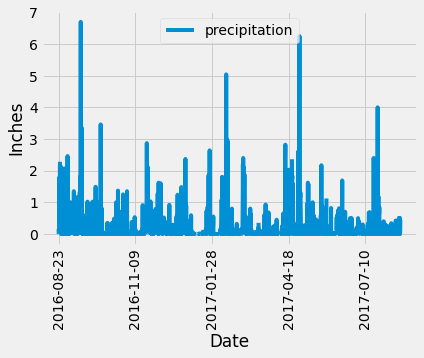

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data

# fig, ax = plt.subplots(figsize=(10,10));
# df_prcp_scores = df_prcp_scores.sort_values(by="date", ascending=False)
# df_prcp_scores.plot.bar(ax=ax);

df_prcp_scores.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(["precipitation"])
plt.xticks(rotation=90)
plt.savefig('precipitation data.png')

plt.show()

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_prcp_scores.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
# Design a query to show how many stations are available in this dataset?

available_stations = Session.query(func.count(measurement.station.distinct())).all()

print(f"There are {available_stations} stations available in this dataset")

There are [(9,)] stations available in this dataset


In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

most_active_stations = Session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

top_active_station = Session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).first()

print(f"The most active station is {top_active_station}.")

most_active_stations

The most active station is ('USC00519281', 2772).


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 

lowest_temperature = Session.query(measurement.station, func.min(measurement.tobs)).\
    filter(measurement.station == top_active_station[0]).all()

lowest_temperature

[('USC00519281', 54.0)]

In [24]:
# highest temperature recorded,

highest_temperature = Session.query(measurement.station, func.max(measurement.tobs)).\
    filter(measurement.station == top_active_station[0]).all()
highest_temperature

[('USC00519281', 85.0)]

In [25]:
# and average temperature of the most active station?

avg_temperature = Session.query(measurement.station, func.avg(measurement.tobs)).\
    filter(measurement.station == top_active_station[0]).all()
avg_temperature

[('USC00519281', 71.66378066378067)]

In [26]:
# Choose the station with the highest number of temperature observations.
# Station USC00519281 has the highest number of temperature observations. 

USC00519281_last12_months = Session.query(measurement.station, measurement.tobs, measurement.date).\
    filter(measurement.date >= year_ago).\
    filter(measurement.station == top_active_station[0]).\
    order_by(measurement.date).all()
           
USC00519281_last12_months

[('USC00519281', 77.0, '2016-08-23'),
 ('USC00519281', 77.0, '2016-08-24'),
 ('USC00519281', 80.0, '2016-08-25'),
 ('USC00519281', 80.0, '2016-08-26'),
 ('USC00519281', 75.0, '2016-08-27'),
 ('USC00519281', 73.0, '2016-08-28'),
 ('USC00519281', 78.0, '2016-08-29'),
 ('USC00519281', 77.0, '2016-08-30'),
 ('USC00519281', 78.0, '2016-08-31'),
 ('USC00519281', 80.0, '2016-09-01'),
 ('USC00519281', 80.0, '2016-09-02'),
 ('USC00519281', 78.0, '2016-09-03'),
 ('USC00519281', 78.0, '2016-09-04'),
 ('USC00519281', 78.0, '2016-09-05'),
 ('USC00519281', 73.0, '2016-09-06'),
 ('USC00519281', 74.0, '2016-09-07'),
 ('USC00519281', 80.0, '2016-09-08'),
 ('USC00519281', 79.0, '2016-09-09'),
 ('USC00519281', 77.0, '2016-09-10'),
 ('USC00519281', 80.0, '2016-09-11'),
 ('USC00519281', 76.0, '2016-09-12'),
 ('USC00519281', 79.0, '2016-09-13'),
 ('USC00519281', 75.0, '2016-09-14'),
 ('USC00519281', 79.0, '2016-09-15'),
 ('USC00519281', 78.0, '2016-09-16'),
 ('USC00519281', 79.0, '2016-09-17'),
 ('USC005192

In [27]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

df_USC00519281 = pd.DataFrame(USC00519281_last12_months)
df_USC00519281.set_index('tobs')

,station,date
tobs,,
77.0,USC00519281,2016-08-23
77.0,USC00519281,2016-08-24
80.0,USC00519281,2016-08-25
80.0,USC00519281,2016-08-26
75.0,USC00519281,2016-08-27
...,...,...
77.0,USC00519281,2017-08-14
77.0,USC00519281,2017-08-15
76.0,USC00519281,2017-08-16


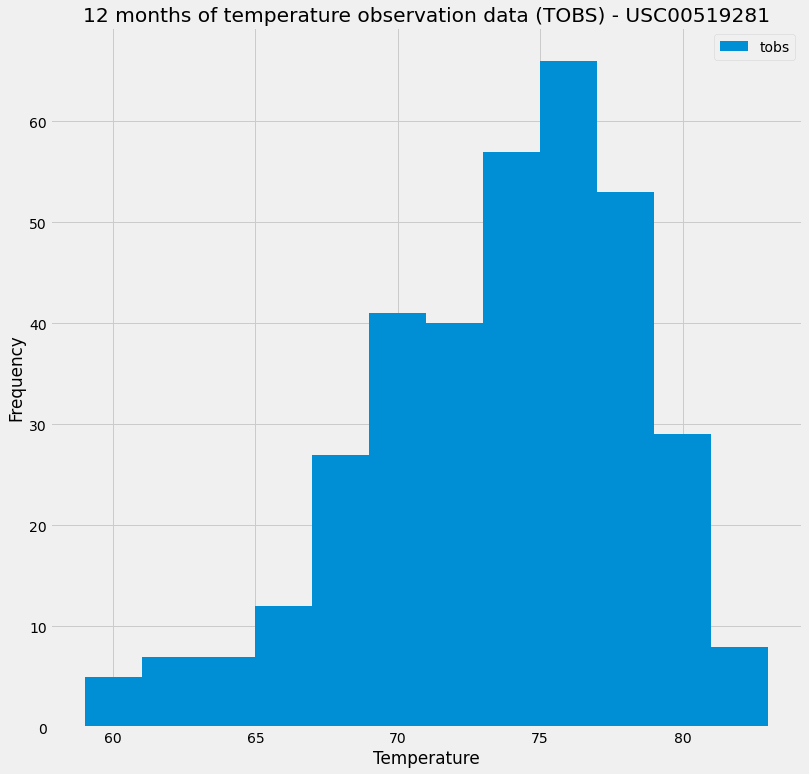

In [28]:
df_USC00519281 = pd.DataFrame(USC00519281_last12_months)
df_USC00519281.plot.hist(by='tobs',bins=12, figsize=(12,12))
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("12 months of temperature observation data (TOBS) - USC00519281")
plt.savefig('12 months of (TOBS) - USC00519281.png')

plt.show()

## Bonus Challenge Assignment

In [29]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return Session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [30]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# July 13, 2017 to July 23, 2017

arrive = dt.date(2017, 7, 13)
departure = dt.date(2017, 7, 23)

print(calc_temps('2017-07-13', '2017-07-23'))

[(72.0, 78.56521739130434, 83.0)]


In [31]:
def startend(start=None, end=None): 
    print("Server received request for '/api/v1.0/start/end' page...")

    statistics = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]

    if not end:
        
        query_dates = Session.query(*statistics).\
            filter(measurement.date >= start).all()
        
        stat_temp = list(np.ravel(query_dates))
        return jsonify(stat_temp) 
        
    query_dates = Session.query(*statistics).\
        filter(measurement.date >= start).\
        filter(measurement.date <= end).all()
    
    stat_temp = list(np.ravel(query_dates))
    
    return jsonify(stat_temp)

In [32]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)



In [33]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [34]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

NameError: name 'Measurement' is not defined

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
